# Statistical analysis of Coma Dataset's Betti Numbers

The goal of this analysis is to find statistical differences in the distribution of betti numbers of comatose and control patients.
In a first step will do a polynomial regression separated for the two categories. In a second step we will do a categorical polynomial regression to see if the estimed coefficients regarding the difference in the two categories are statistically significant.

## Description of the detaset
The dataset we are analysing is the measurement of the 0-1-2 dimensional Betti numbers for the Coma Datasets. Betti numbers are evalued to the flag complex of a graph generated from a correlation matrixa and a threshold. All the values under the threshold are considered noise and the two nodes have no link. The threshold values for a given dimension are equally spaced between the smallest value in which a betti number of that dimension appear and the maximum value in which a betti number disappear.

Let us import the dataset

In [1]:
import pickle
import numpy as np

with open("data/patients_betti","rb") as f:
    (betti_numbers_patients,patient_files,thresholds)=pickle.load(f)

with open("data/controls_betti","rb") as f:
    (betti_numbers_controls,control_files,thresholds)=pickle.load(f)
    
betti_numbers_patients=np.array(betti_numbers_patients)
betti_numbers_controls=np.array(betti_numbers_controls)

Let now consider only one dimensional betti numbers

In [2]:
dimension=1

betti1_patients=betti_numbers_patients[:,0,dimension,:]
betti1_controls=betti_numbers_controls[:,0,dimension,:]

thresholds1=thresholds[dimension]

Let us do a scatter plot of the betti number separated for category

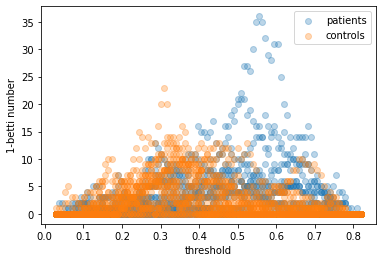

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(np.tile(thresholds1, len(betti1_patients)), betti1_patients.flatten(),alpha=0.3,label='patients')
ax.scatter(np.tile(thresholds1, len(betti1_controls)), betti1_controls.flatten(),alpha=0.3,label='controls')
ax.set_xlabel('threshold')  # Add an x-label to the axes.
ax.set_ylabel(str(dimension)+'-betti number')
ax.legend()
plt.show()

## Polynomial Regression separated for category
We will now do three polynomial regression: one for each category and one for the whole dataset.
We decided to 

In [4]:
import statsmodels.api as sm

In [5]:
x=np.tile(thresholds1, len(betti1_patients))
y=betti1_patients.flatten()
X = np.column_stack((x, x ** 2,x**3))
X = sm.add_constant(X)
OLS_patients = sm.OLS(y, X)
results_patients = OLS_patients.fit()
print(results_patients.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     124.3
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           2.29e-72
Time:                        14:58:14   Log-Likelihood:                -4485.6
No. Observations:                1600   AIC:                             8979.
Df Residuals:                    1596   BIC:                             9001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4685      0.505      0.927      0.3

In [6]:
x=np.tile(thresholds1, len(betti1_controls))
y=betti1_controls.flatten()
X = np.column_stack((x, x ** 2,x**3))
X = sm.add_constant(X)
OLS_controls = sm.OLS(y, X)
results_controls = OLS_controls.fit()
print(results_controls.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     238.8
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          2.07e-132
Time:                        14:58:14   Log-Likelihood:                -4856.9
No. Observations:                2000   AIC:                             9722.
Df Residuals:                    1996   BIC:                             9744.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4736      0.310    -11.189      0.0

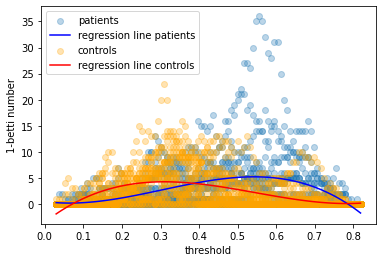

In [7]:
x_plot=np.linspace(min(thresholds1),max(thresholds1),100)
X_plot = np.column_stack((x_plot, x_plot ** 2,x_plot**3))
X_plot = sm.add_constant(X_plot)

y_patients = np.dot(X_plot, results_patients.params)
y_controls = np.dot(X_plot, results_controls.params)

fig, ax = plt.subplots()
ax.scatter(np.tile(thresholds1, len(betti1_patients)), betti1_patients.flatten(),alpha=0.3,label='patients')
ax.plot(x_plot, y_patients,label='regression line patients',color='blue')
ax.scatter(np.tile(thresholds1, len(betti1_controls)), betti1_controls.flatten(),alpha=0.3,label='controls',color='orange')
ax.plot(x_plot, y_controls,label='regression line controls',color='red')
ax.set_xlabel('threshold')  # Add an x-label to the axes.
ax.set_ylabel(str(dimension)+'-betti number')
ax.legend()
plt.show()

In [8]:
x=np.tile(thresholds1, len(betti1_patients)+len(betti1_controls))
y=np.concatenate((betti1_patients.flatten(),betti1_controls.flatten()))
X = np.column_stack((x, x**2,x**3))
X = sm.add_constant(X)

OLS_mixed = sm.OLS(y, X).fit()
print(OLS_mixed.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          4.96e-124
Time:                        14:58:15   Log-Likelihood:                -9635.5
No. Observations:                3600   AIC:                         1.928e+04
Df Residuals:                    3596   BIC:                         1.930e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7216      0.296     -5.808      0.0

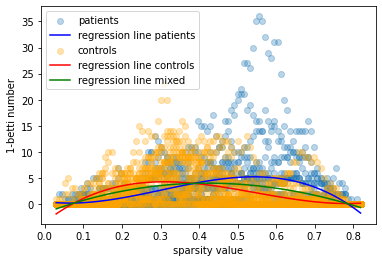

In [9]:
x_plot=np.linspace(min(thresholds1),max(thresholds1),100)
X_plot = np.column_stack((x_plot, x_plot ** 2,x_plot ** 3))
X_plot = sm.add_constant(X_plot)

y_plot = np.dot(X_plot, OLS_mixed.params)
fig, ax = plt.subplots()
ax.scatter(np.tile(thresholds1, len(betti1_patients)), betti1_patients.flatten(),alpha=0.3,label='patients')
ax.plot(x_plot, y_patients,label='regression line patients',color='blue')
ax.scatter(np.tile(thresholds1, len(betti1_controls)), betti1_controls.flatten(),alpha=0.3,label='controls',color='orange')
ax.plot(x_plot, y_controls,label='regression line controls',color='red')
ax.plot(x_plot, y_plot,label='regression line mixed',color='green')
ax.set_xlabel('sparsity value')  # Add an x-label to the axes.
ax.set_ylabel('1-betti number')
ax.legend()
plt.show()

## Categorical Polynomial Regression
We will now do a Categorical Polynomial Regression: on the entire dataset we consider the possibility that the two groups have different regression coefficients and we evaluate the null hypotesis that they are equal.
As we will see all the parameters seems to be highly significative.

In [10]:
import pandas as pd

x=np.tile(thresholds1, len(betti1_patients)+len(betti1_controls))
y=np.concatenate((betti1_patients.flatten(),betti1_controls.flatten()))

nsample=len(betti1_patients.flatten())+len(betti1_controls.flatten())
groups = np.zeros(nsample)
groups[len(betti1_patients.flatten()):]=1
dummy = pd.get_dummies(groups).values

X = np.column_stack((x, x**2,x**3,dummy[:, 1],x*dummy[:, 1],(x**2)*dummy[:, 1],(x**3)*dummy[:, 1]))
X = sm.add_constant(X)

OLS_categorical = sm.OLS(y, X).fit()
print(OLS_categorical.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 22 Aug 2022   Prob (F-statistic):          1.05e-191
Time:                        14:58:15   Log-Likelihood:                -9468.1
No. Observations:                3600   AIC:                         1.895e+04
Df Residuals:                    3592   BIC:                         1.900e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4685      0.425      1.103      0.2

x4, x5, x6, x7 corresponds to the parameter who consider the interaction with the categorical attribute of being a control patient. We see that they all have a p-value very significative.

## GLM
The gaussian hypotesis behind the linear regression it is not applicable in our context of analysis. In fact betti numbers are all positive integers. We may try to fit them with negative binomial distribution since they are overdispersed. Therefore, we try to repeat the last regression with a generalized linear model. 

In [11]:
x=np.tile(thresholds1, len(betti1_patients))
y=betti1_patients.flatten()
X = np.column_stack((x, x ** 2, x**3))
X = sm.add_constant(X)

GLM_patients = sm.GLM(y, X, family=sm.families.NegativeBinomial())
results_patients = GLM_patients.fit()
print(results_patients.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1596
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.1
Date:                Mon, 22 Aug 2022   Deviance:                       1898.9
Time:                        14:58:15   Pearson chi2:                 1.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4162
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5659      0.235     -6.654      0.0

In [12]:
x=np.tile(thresholds1, len(betti1_controls))
y=betti1_controls.flatten()
X = np.column_stack((x, x ** 2,x**3))
X = sm.add_constant(X)
GLM_controls = sm.GLM(y, X, family=sm.families.NegativeBinomial())
results_controls = GLM_controls.fit()
print(results_controls.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1996
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3352.6
Date:                Mon, 22 Aug 2022   Deviance:                       2097.2
Time:                        14:58:15   Pearson chi2:                 2.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4272
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4387      0.234    -14.698      0.0

In [13]:
x=np.tile(thresholds1, len(betti1_patients)+len(betti1_controls))
y=np.concatenate((betti1_patients.flatten(),betti1_controls.flatten()))

nsample=len(betti1_patients.flatten())+len(betti1_controls.flatten())
groups = np.zeros(nsample)
groups[len(betti1_patients.flatten()):]=1
dummy = pd.get_dummies(groups).values

X = np.column_stack((x, x**2,x**3,dummy[:, 1],x*dummy[:, 1],(x**2)*dummy[:, 1],(x**3)*dummy[:, 1]))
X = sm.add_constant(X)

GLM_categorical = sm.GLM(y,X,sm.families.NegativeBinomial()).fit()
print(GLM_categorical.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3600
Model:                            GLM   Df Residuals:                     3592
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6367.6
Date:                Mon, 22 Aug 2022   Deviance:                       3996.1
Time:                        14:58:15   Pearson chi2:                 4.43e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4280
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5659      0.235     -6.654      0.0

All the paraters are significative. Therfore, we must reject he null hypotesis that coma hase no effect on the distribution of betti numbers in the brain.